In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython import display
%matplotlib inline

In [5]:
dataset = pd.read_csv('ADRvsRating.csv')
data = dataset.as_matrix()
numInstances = data.shape[0]
dataset.head()

/home/rj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,ADR,Rating
0,85.0,117.0
1,83.5,110.0
2,78.2,102.0
3,68.1,97.0
4,66.3,86.0


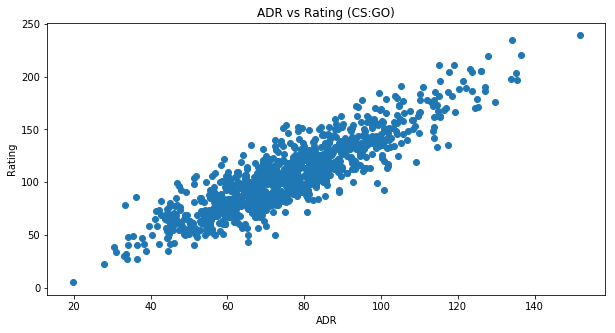

In [6]:
plt.figure(figsize=(10,5))
plt.title('ADR vs Rating (CS:GO)')
plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

In [9]:
def SSE(m,b,data):
    totalError =0.0
    for i in range(numInstances):
        adr = data[i,0]
        rating = data[i,1]
        currentTarget = rating
        currentOutput = m*adr +b
        er = (currentTarget - currentOutput)**2
        totalError += er
    see = er/numInstances
    return totalError

In [10]:
m = 2
b = 3

sse = SSE(m,b,data)

print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

For the fitting line: y = 2x + 3
SSE: 2644260.84


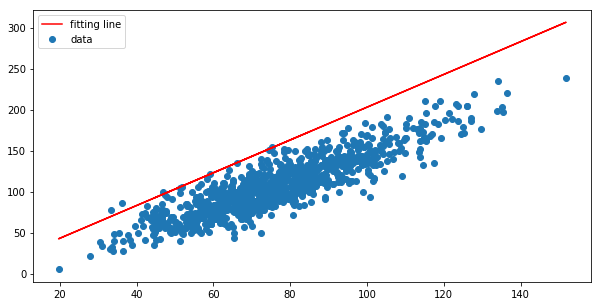

In [12]:
fig = plt.figure(figsize=(10,5))
ax= fig.add_subplot(111)
ax.scatter(x= data[:,0],y=data[:,1],label='data')
plt.plot(data[:,0],m*data[:,0]+b,color='red',label='fitting line')
ax.legend(loc='best')
plt.show()

In [26]:
def gdstep(m,b,data):
    N = numInstances
    m_grad=0
    b_grad=0
    for i in range(N):
        x = data[i,0]
        y = data[i,1]
        dm = -((2/N)*x*(y-(m*x+b)))
        db = -((2/N)*(y-(m*x+b)))
        m_grad = m_grad + dm
        b_grad = b_grad + db
        m_updated = m - 0.0001*m_grad
        b_updated = b - 0.0001*b_grad
    return m_updated,b_updated

In [27]:
m = 2
b = 3

sse = SSE(m,b,data)

print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))
for i in range(2):
    m,b = gdstep(m,b,data)
    sse = SSE(m,b,data)
    print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))

print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

Starting line: y = 2.00x + 3.00 - Error: 2644260.84
At step 1 - Line: y = 1.24x + 2.99 - Error: 392986.89
At step 2 - Line: y = 1.41x + 2.99 - Error: 280130.02

Best  line: y = 1.41x + 2.99 - Error: 280130.02


In [28]:
def gd(m_starting,b_starting,data,steps):
    print('Starting line: y = %.6fx + %.6f - Error: %.6f\n' %(m_starting,b_starting,SSE(m_starting,b_starting,data)))
    m = m_starting
    b = b_starting
    display_freq= steps//10
    for i in range(steps):
        m,b = gdstep(m,b,data)
        if(i%display_freq == 0):
            sse = SSE(m,b,data)
            print('At step %d - Line: y = %.6fx + %.6f - Error: %.6f' %(i+1,m,b,sse))
    print('\nBest  line: y = %.6fx + %.6f - Error: %.6f' %(m,b,sse))
    return m,b      
            

In [29]:
M_STARTING = 0
B_STARTING = 0
NUM_STEPS = 1000
m_best,b_best = gd(M_STARTING,B_STARTING,data,NUM_STEPS)

Starting line: y = 0.000000x + 0.000000 - Error: 12515672.000000

At step 1 - Line: y = 1.731325x + 0.021283 - Error: 882127.484132
At step 101 - Line: y = 1.414829x + -0.001087 - Error: 268125.411577
At step 201 - Line: y = 1.415057x + -0.019509 - Error: 268091.472115
At step 301 - Line: y = 1.415286x + -0.037908 - Error: 268057.613035
At step 401 - Line: y = 1.415513x + -0.056286 - Error: 268023.834147
At step 501 - Line: y = 1.415741x + -0.074642 - Error: 267990.135259
At step 601 - Line: y = 1.415968x + -0.092976 - Error: 267956.516183
At step 701 - Line: y = 1.416195x + -0.111288 - Error: 267922.976730
At step 801 - Line: y = 1.416422x + -0.129579 - Error: 267889.516711
At step 901 - Line: y = 1.416649x + -0.147848 - Error: 267856.135939

Best  line: y = 1.416873x + -0.165913 - Error: 267856.135939


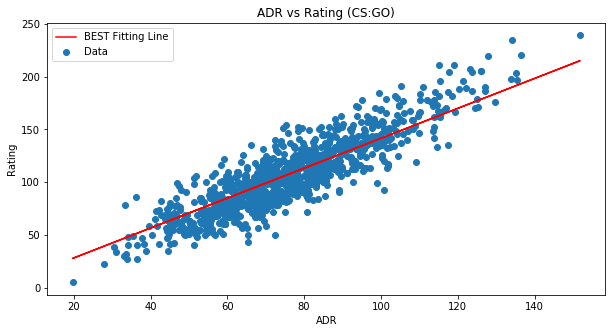

In [30]:
m=m_best
b=b_best
x = data[:,0]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=x,y=data[:,1],label='Data')
plt.plot(x, m*x + b,color='red',label='BEST Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')

plt.show()

Text(0.5,0,'Error')

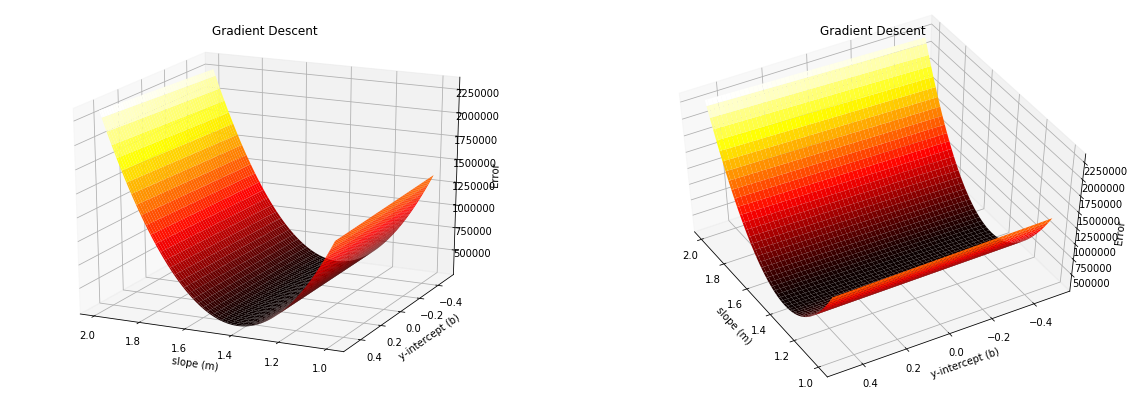

In [32]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

def error(x, y):
    return SSE(x,y,data)

m = np.arange(1,2,0.01)
b = np.arange(-0.5,0.5,0.01)


fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=20.0, azim=115)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,cmap='hot')

ax.set_title('Gradient Descent')
ax.set_xlabel('slope (m)')
ax.set_ylabel('y-intercept (b)')
ax.set_zlabel('Error')

#PLOT2
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=50.0, azim=150)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax2.plot_surface(X, Y, Z,cmap='hot')

ax2.set_title('Gradient Descent')
ax2.set_xlabel('slope (m)')
ax2.set_ylabel('y-intercept (b)')
ax2.set_zlabel('Error')

In [33]:
zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,cmap='hot')

ax.set_title('Gradient Descent')
ax.set_xlabel('slope (m)')
ax.set_ylabel('y-intercept (b)')
ax.set_zlabel('Error')

#PLOT2
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=50.0, azim=150)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax2.plot_surface(X, Y, Z,cmap='hot')

ax2.set_title('Gradient Descent')
ax2.set_xlabel('slope (m)')
ax2.set_ylabel('y-intercept (b)')
ax2.set_zlabel('Error')

Text(0.5,0,'Error')

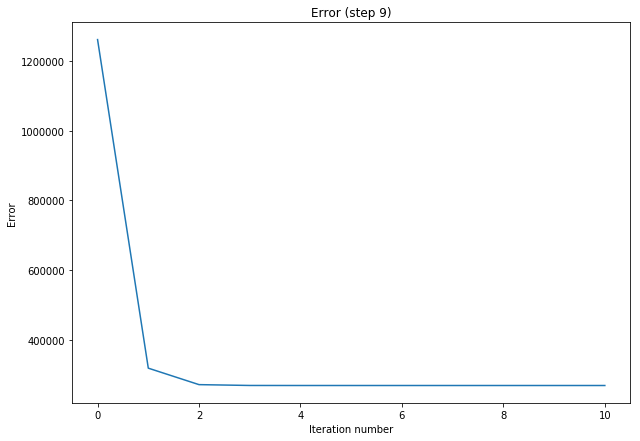

In [35]:
def error_plot(fig,ax,error_list,error,data,step):
    #PLOT2

    ax.cla()
    
    ax.set_title('Error (step %d)' % step)
    ax.set_xlabel('Iteration number')
    ax.set_ylabel('Error')
    
    ax.plot(np.arange(0,len(error_list)),error_list)    
    fig.canvas.draw()
    
def gradient_descent_n_steps_with_error_plot(m_starting,b_starting,data,steps): #For doing it many times in an easy way ;)
    
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    
    m = m_starting
    b = b_starting
    error_list = list()
    
    
    error = SSE(m,b,data)
    error_list.append(error)
    
    plt.cla()
    for i in range(steps):
        step = i
        error_plot(fig,ax,error_list,error,data,step)
        
        m,b = gdstep(m,b,data)
        error = SSE(m,b,data)
        error_list.append(error)
        
        time.sleep(10/steps)
        plt.cla()
        #############
            
    error_plot(fig,ax,error_list,error,data,step)
#end def

#RUN IT!

m = 1
b = 1
steps = 10
gradient_descent_n_steps_with_error_plot(m,b,data,steps)